In [37]:
import pertpy as pt
import scanpy as sc
import pandas as pd
import numpy as np

In [38]:
adata = pt.dt.dialogue_example()
adata

AnnData object with n_obs × n_vars = 5374 × 6329
    obs: 'nCount_RNA', 'nFeature_RNA', 'cellQ', 'gender', 'location', 'clinical.status', 'cell.subtypes', 'pathology', 'origin', 'subset'
    var: 'name'

In [39]:
#sc.pp.normalize_total(adata, target_sum=1e4)
#sc.pp.log1p(adata)
#sc.pp.scale(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [33]:
#adata.obs['Number of counts'] = adata.obs['nCount_RNA']

In [40]:
dl = pt.tl.Dialogue(sample_id = "clinical.status",
                   celltype_key = "cell.subtypes",
                   n_counts_key = "nCount_RNA",
                   n_mpcs = 3)

In [41]:
adata, mcps, ws, ct_subs = dl.calculate_multifactor_PMD(
    adata,
    normalize=True,
    solver="lp"
)



In [42]:
all_results, new_mcps = dl.multilevel_modeling(ct_subs=ct_subs,
                                     mcp_scores=mcps,
                                     ws_dict=ws,
                                     confounder=None,
                                   )

Output()

3 MCPs identified for CD8+ IELs and CD8+ IL17+.

KeyError: '[None] not in index'

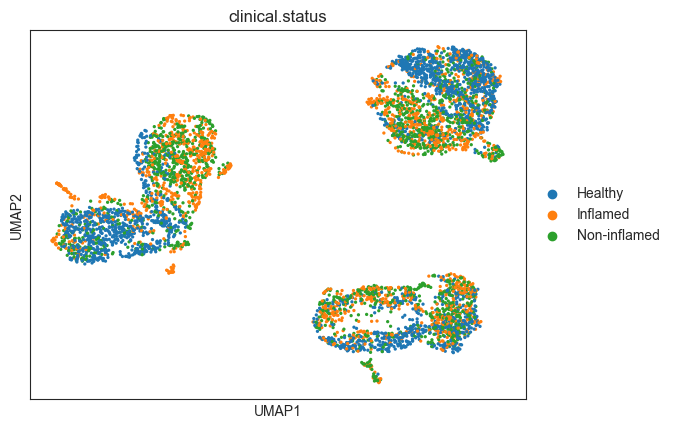

In [19]:
sc.pl.umap(
    adata,
    color=[
        "clinical.status"
    ],
)

In [37]:
dl = pt.tl.Dialogue(sample_id = "clinical.status",
                   celltype_key = "cell.subtypes",
                   n_counts_key = "nCount_RNA",
                   n_mpcs = 3)

In [38]:
adata, mcps, ws, ct_subs = dl.calculate_multifactor_PMD(
    adata,
    normalize=True,
    solver="lp"
)

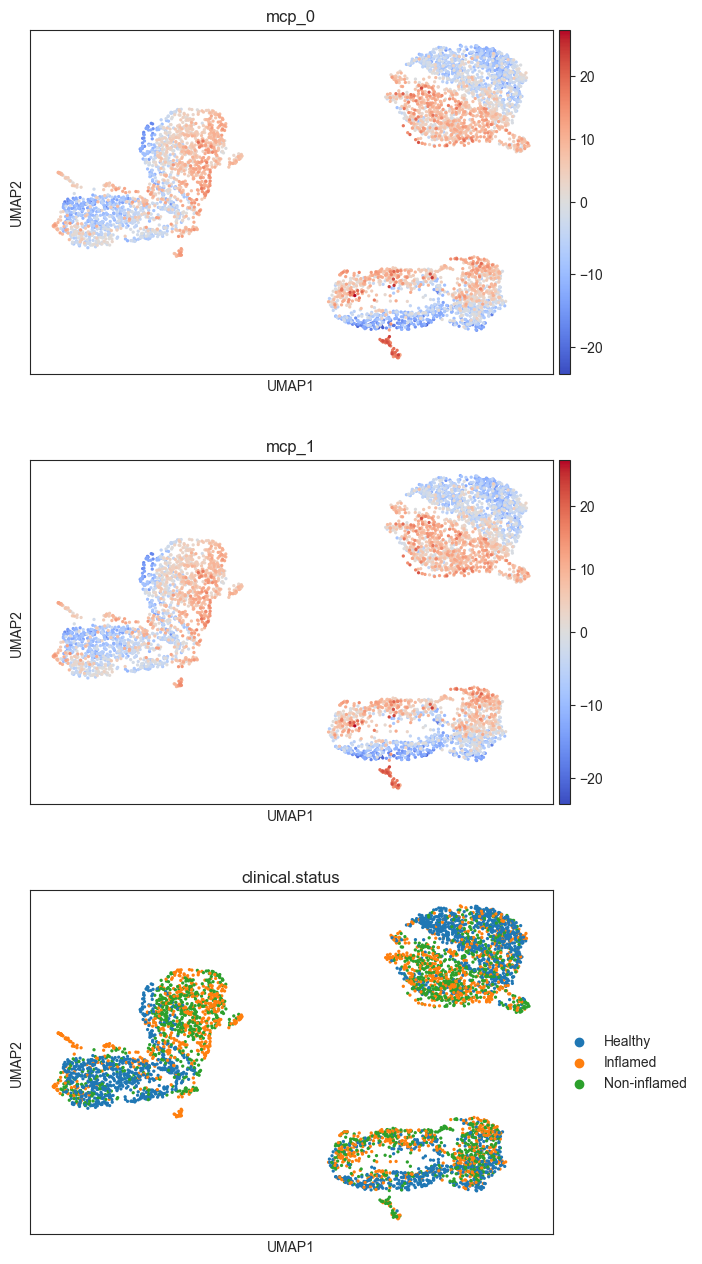

In [22]:
sc.pl.umap(adata, color=['mcp_0', 'mcp_1', 'clinical.status'], ncols=1, cmap='coolwarm', vcenter=0)


In [39]:
adata

AnnData object with n_obs × n_vars = 5374 × 6329
    obs: 'nCount_RNA', 'nFeature_RNA', 'cellQ', 'gender', 'location', 'clinical.status', 'cell.subtypes', 'pathology', 'origin', 'subset', 'mcp_0', 'mcp_1', 'mcp_2'
    obsm: 'X_pca', 'X_umap'

In [40]:
all_results, new_mcps = dl.multilevel_modeling(ct_subs=ct_subs,
                                     mcp_scores=mcps,
                                     ws_dict=ws,
                                     confounder="gender",
                                   )

Output()

3 MCPs identified for CD8+ IELs and CD8+ IL17+.

3 MCPs identified for CD8+ IELs and CD8+ LP.

3 MCPs identified for CD8+ IELs and Macrophages.

3 MCPs identified for CD8+ IELs and TA2.

3 MCPs identified for CD8+ IL17+ and CD8+ LP.

3 MCPs identified for CD8+ IL17+ and Macrophages.

3 MCPs identified for CD8+ IL17+ and TA2.

3 MCPs identified for CD8+ LP and Macrophages.

3 MCPs identified for CD8+ LP and TA2.

3 MCPs identified for Macrophages and TA2.

In [41]:
all_results

{'CD8+ IELs_vs_CD8+ IL17+': {'MCP1': {'HLM_result_1':              estimate         p_val   z_score  p_adjust    up program
   AAK1        14.948880  6.379106e-07  6.496270  0.000005  True    MCP1
   ABCE1       13.772942  4.920024e-04  3.609063  0.000725  True    MCP1
   ABCF1       17.368491  1.262790e-05  5.199699  0.000028  True    MCP1
   AC020571.3  21.274835  1.377934e-04  4.161801  0.000227  True    MCP1
   AC092580.4   3.750892  8.006954e-05  4.397563  0.000144  True    MCP1
   ...               ...           ...       ...       ...   ...     ...
   YWHAZ        6.972635  7.214107e-05  4.442847  0.000134  True    MCP1
   YY1         11.032620  1.119959e-04  4.251828  0.000191  True    MCP1
   ZC3HAV1     13.713115  8.102758e-05  4.392397  0.000145  True    MCP1
   ZEB2        16.664818  1.060785e-01  1.275402  0.110007  True    MCP1
   ZNF644      23.374513  5.265439e-07  6.579595  0.000005  True    MCP1
   
   [252 rows x 6 columns],
   'sig_genes_1': {'MCP1.up': ['AAK1',
   

In [25]:
all_results.keys()

dict_keys(['CD8+ IELs_vs_CD8+ IL17+', 'CD8+ IELs_vs_CD8+ LP', 'CD8+ IELs_vs_Macrophages', 'CD8+ IELs_vs_TA2', 'CD8+ IL17+_vs_CD8+ LP', 'CD8+ IL17+_vs_Macrophages', 'CD8+ IL17+_vs_TA2', 'CD8+ LP_vs_Macrophages', 'CD8+ LP_vs_TA2', 'Macrophages_vs_TA2'])

In [32]:
new_mcps['TA2'][0].shape

(400, 1905)

In [42]:
ct_subs

{'CD8+ IELs': AnnData object with n_obs × n_vars = 752 × 6329
     obs: 'nCount_RNA', 'nFeature_RNA', 'cellQ', 'gender', 'location', 'clinical.status', 'cell.subtypes', 'pathology', 'origin', 'subset', 'mcp_0', 'mcp_1', 'mcp_2'
     var: 'name'
     uns: 'pca', 'neighbors', 'umap'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs'
     obsp: 'distances', 'connectivities',
 'CD8+ IL17+': AnnData object with n_obs × n_vars = 99 × 6329
     obs: 'nCount_RNA', 'nFeature_RNA', 'cellQ', 'gender', 'location', 'clinical.status', 'cell.subtypes', 'pathology', 'origin', 'subset', 'mcp_0', 'mcp_1', 'mcp_2'
     var: 'name'
     uns: 'pca', 'neighbors', 'umap'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs'
     obsp: 'distances', 'connectivities',
 'CD8+ LP': AnnData object with n_obs × n_vars = 1166 × 6329
     obs: 'nCount_RNA', 'nFeature_RNA', 'cellQ', 'gender', 'location', 'clinical.status', 'cell.subtypes', 'pathology', 'origin', 'subset', 'mcp_0', 'mcp_1', 'mcp_2'
     var: 'name'
     uns: 'pca',

CD8+ IELs
CD8+ IL17+
CD8+ LP
Macrophages
TA2


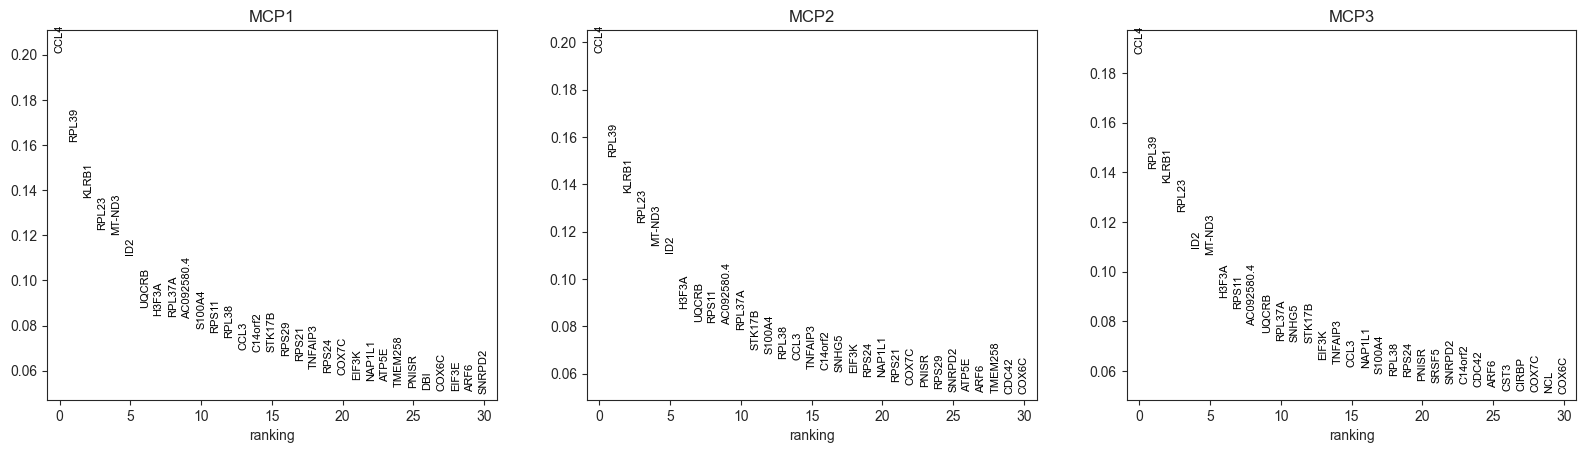

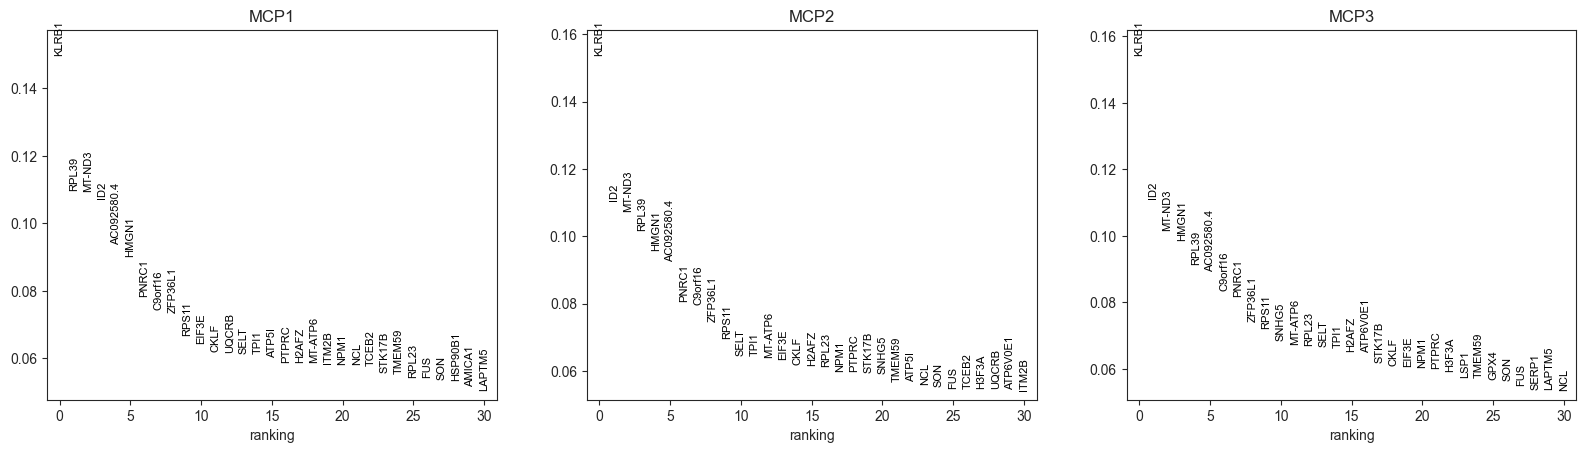

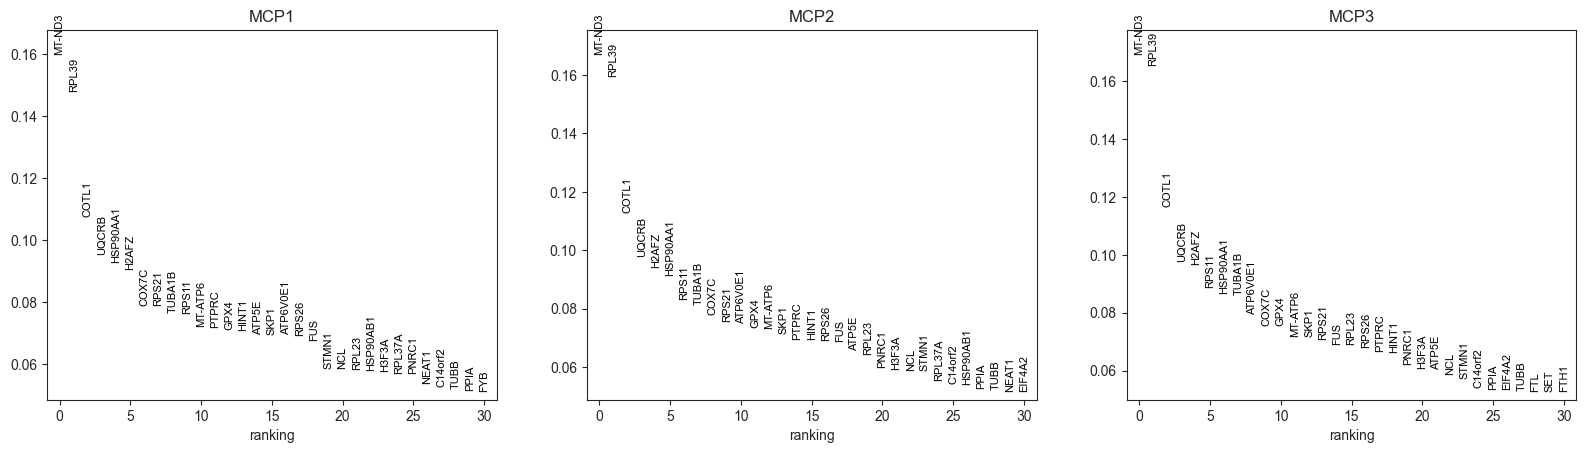

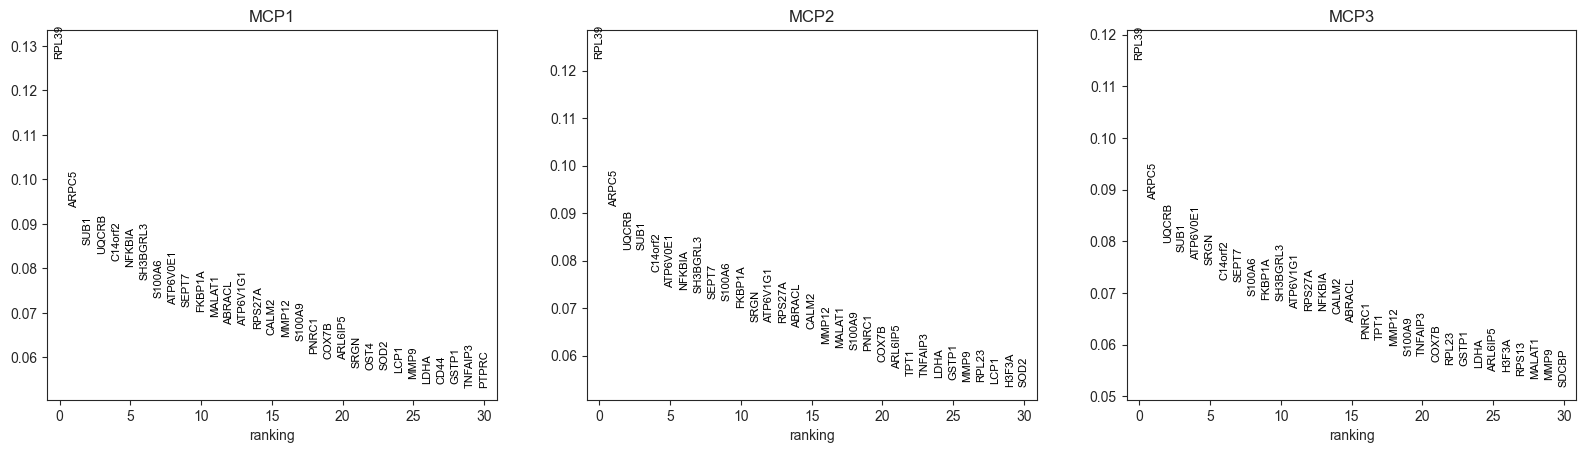

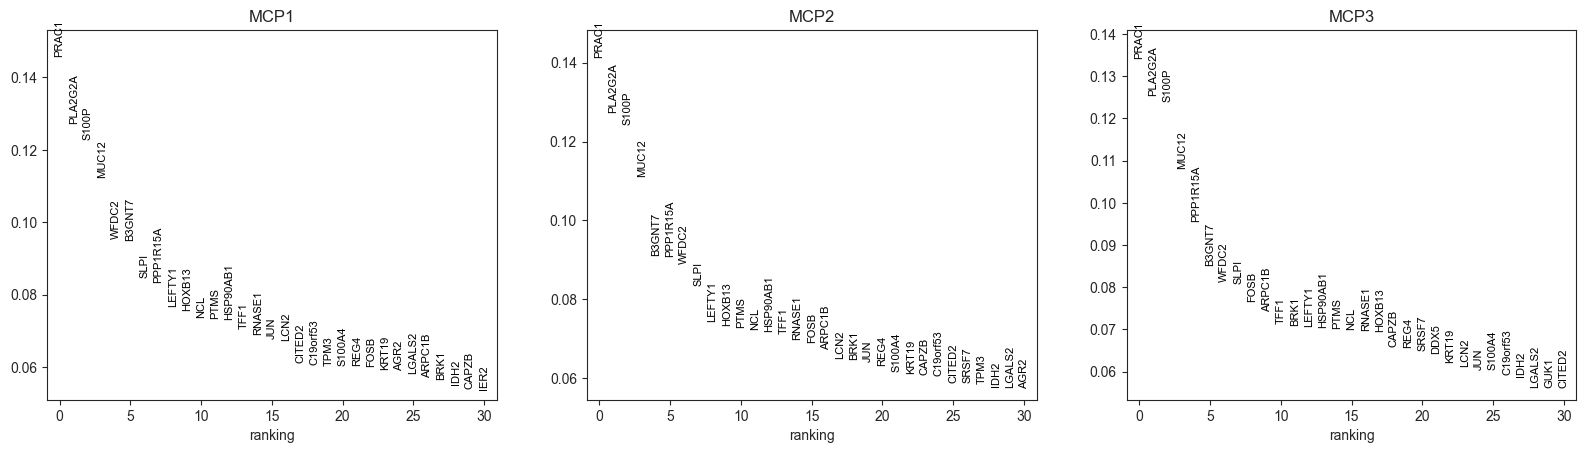

In [51]:
for celltype in ct_subs.keys():
    dset=ct_subs[celltype]
    dset.varm['MCPs'] =  np.matmul(dset.varm['PCs'], ws[celltype])
    print(celltype)
    sc.pl._anndata.ranking(dset, "varm","MCPs",indices = [0,1,2,], n_points=30)

In [71]:
ct_subs['TA2'].X

<1905x6329 sparse matrix of type '<class 'numpy.float32'>'
	with 3216264 stored elements in Compressed Sparse Column format>

In [58]:
sc.pp.pca(adata)


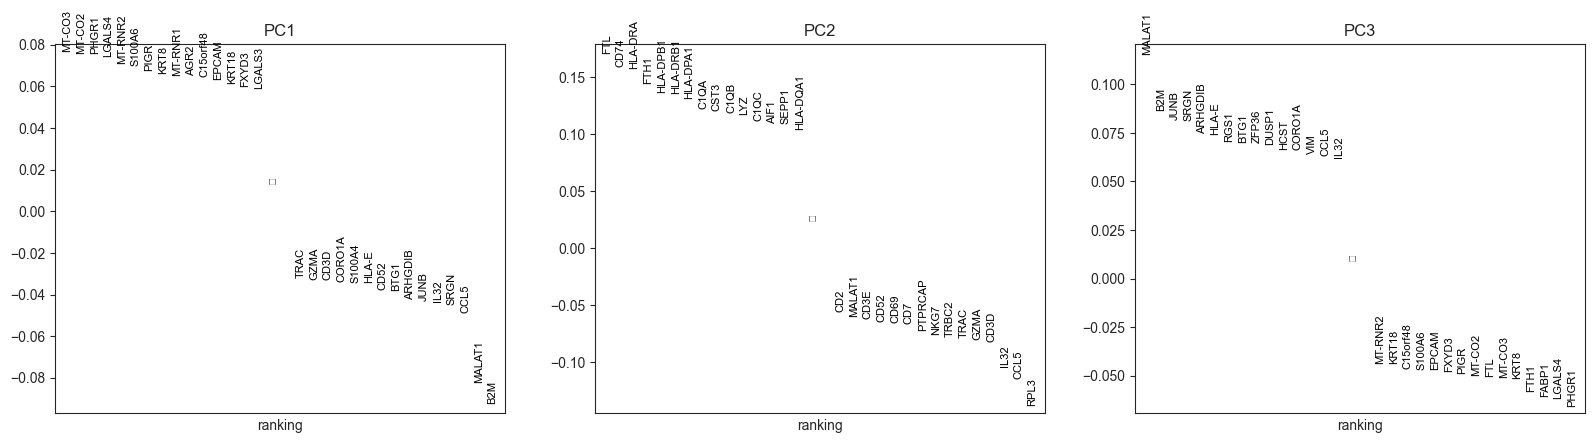

In [61]:
sc.pl.pca_loadings(adata)

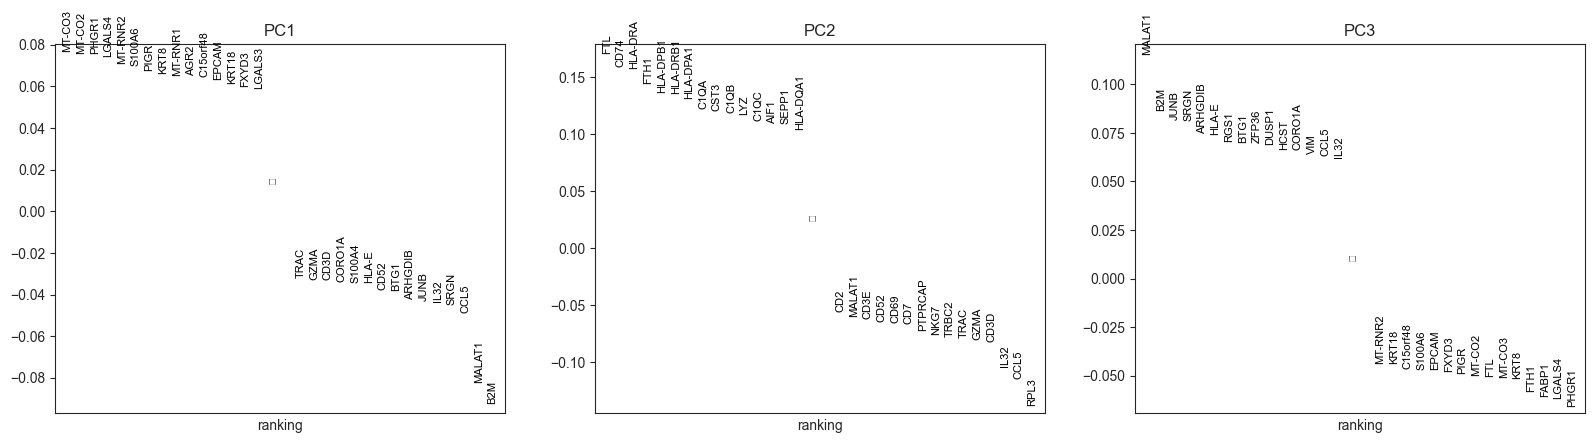

In [65]:
sc.pl.pca_loadings(adata[adata.obs['cell.subtypes']=="TA2"])

In [64]:
adata.obs['cell.subtypes']

index
N7.EpiA.AAGGTGCTACGGAG       CD8+ IELs
N7.EpiA.AAGTAACTTGCTTT       CD8+ IELs
N7.EpiA.ACAGTTCTTCTACT       CD8+ IELs
N7.EpiA.ACGGTCCTGTACGT       CD8+ IELs
N7.EpiA.ATGCGCCTGATAGA       CD8+ IELs
                               ...    
N110.LPB.TCAGCTCCAATCGGTT          TA2
N110.LPB.TCATTTGAGATTACCC          TA2
N110.LPB.TGCACCTAGGTCATCT          TA2
N110.LPB.TGGGCGTGTACAGTTC          TA2
N110.LPB.TTGGCAATCCGTAGGC          TA2
Name: cell.subtypes, Length: 5374, dtype: object

{'CD8+ IELs': array([[-4.51558424, -4.61885191, -4.69080464],
        [ 2.05459318,  1.90733226,  1.7415654 ],
        [-5.33662925, -5.03060889, -4.7417667 ],
        ...,
        [ 8.80162223,  8.93224434,  8.87128811],
        [ 9.91239999, 10.44368289, 10.81119681],
        [ 5.85092182,  5.43490349,  4.98992706]]),
 'CD8+ IL17+': array([[ 5.80907278e+00,  6.26860506e+00,  6.55220472e+00],
        [ 3.45218613e+00,  2.87884510e+00,  2.26217344e+00],
        [ 1.43273085e+00,  7.19946318e-01,  2.81116176e-02],
        [ 5.49220872e+00,  5.08922306e+00,  4.56361093e+00],
        [ 4.18995623e+00,  3.57236872e+00,  3.00611144e+00],
        [ 3.69175439e+00,  3.14014471e+00,  2.65013328e+00],
        [ 5.17914553e+00,  4.21447208e+00,  3.23132657e+00],
        [ 3.59398707e-01,  6.62015595e-01,  9.26685251e-01],
        [ 9.26062480e-01,  1.64471566e+00,  2.24185859e+00],
        [-4.84960791e+00, -5.02566800e+00, -5.05827268e+00],
        [ 6.68645961e+00,  6.44439229e+00,  6.16671568

In [75]:
ct_subs['TA2'].obs['nCount_RNA']

index
N7.EpiA.AAACGCACAATCGC        2176.911552
N7.EpiA.AGATATTGATCGGT        4319.159178
N7.EpiA.AGTCTACTTCTCTA        7230.356204
N7.EpiA.ATATACGAAGTACC        5868.425665
N7.EpiA.ATCTGTTGTCATTC        3130.076031
                                 ...     
N110.LPB.TCAGCTCCAATCGGTT     7460.559706
N110.LPB.TCATTTGAGATTACCC    10668.557015
N110.LPB.TGCACCTAGGTCATCT     7660.799949
N110.LPB.TGGGCGTGTACAGTTC     6040.285880
N110.LPB.TTGGCAATCCGTAGGC     6839.696918
Name: nCount_RNA, Length: 1905, dtype: float64

In [81]:
vars(dl)

{'sample_id': 'clinical.status',
 'celltype_key': 'cell.subtypes',
 'n_counts_key': 'nCount_RNA',
 'n_mcps': 3}